In [1]:
#pip install statsbombpy

In [2]:
#!pip install highlight_text

In [3]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#from highlight_text import fig_text
from mplsoccer import PyPizza, FontManager, add_image
from scipy import stats
#from scipy.stats import rankdata

In [4]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

# Загрузка и подготовка данных

In [5]:
# Устанавливаем максимальное количество отображаемых строк
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
#display(sb.competitions())

In [7]:
sb.matches(competition_id=11, season_id=90)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3773386,2020-10-31,21:00:00.000,Spain - La Liga,2020/2021,Deportivo Alavés,Barcelona,1,1,available,available,2023-07-25T03:54:59.280826,2023-07-25T04:25:41.348202,8,Regular Season,Estadio de Mendizorroza,NaN,Pablo Javier Machín Díez,Ronald Koeman,1.1.0,2,2
1,3773565,2021-01-09,18:30:00.000,Spain - La Liga,2020/2021,Granada,Barcelona,0,4,available,available,2023-07-25T03:51:37.437064,2023-07-25T04:30:16.058384,18,Regular Season,Estadio Nuevo Los Cármenes,Ricardo De Burgos Bengoetxea,Diego Martínez Penas,Ronald Koeman,1.1.0,2,2
2,3773457,2021-05-16,18:30:00.000,Spain - La Liga,2020/2021,Barcelona,Celta Vigo,1,2,available,available,2022-12-02T09:26:39.496362,2023-04-27T23:03:53.506485,37,Regular Season,Spotify Camp Nou,NaN,Ronald Koeman,Eduardo Germán Coudet,1.1.0,2,2
3,3773631,2021-02-07,21:00:00.000,Spain - La Liga,2020/2021,Real Betis,Barcelona,2,3,available,available,2023-07-25T03:47:44.278651,2023-07-25T03:56:34.733180,22,Regular Season,Estadio Benito Villamarín,NaN,Manuel Luis Pellegrini Ripamonti,Ronald Koeman,1.1.0,2,2
4,3773665,2021-03-06,21:00:00.000,Spain - La Liga,2020/2021,Osasuna,Barcelona,0,2,available,available,2022-12-02T08:46:42.897589,2023-04-28T02:57:03.412841,26,Regular Season,Estadio El Sadar,Guillermo Cuadra Fernández,Jagoba Arrasate Elustondo,Ronald Koeman,1.1.0,2,2
5,3773497,2021-04-10,21:00:00.000,Spain - La Liga,2020/2021,Real Madrid,Barcelona,2,1,available,available,2022-12-02T09:04:21.859831,2023-04-28T01:35:16.051381,30,Regular Season,Estadio Alfredo Di Stéfano,Jesús Gil Manzano,Zinédine Zidane,Ronald Koeman,1.1.0,2,2
6,3773660,2020-12-13,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Levante UD,1,0,available,available,2022-12-01T14:49:02.748131,2023-04-28T06:01:10.173360,13,Regular Season,Spotify Camp Nou,Ricardo De Burgos Bengoetxea,Ronald Koeman,Francisco José López Fernández,1.1.0,2,2
7,3773593,2020-09-27,21:00:00.000,Spain - La Liga,2020/2021,Barcelona,Villarreal,4,0,available,available,2023-07-25T04:01:57.790373,2023-07-25T04:44:03.367478,3,Regular Season,Spotify Camp Nou,Guillermo Cuadra Fernández,Ronald Koeman,Unai Emery Etxegoien,1.1.0,2,2
8,3773466,2020-10-01,21:30:00.000,Spain - La Liga,2020/2021,Celta Vigo,Barcelona,0,3,available,available,2023-07-25T03:55:25.794505,2023-07-25T04:40:53.635540,4,Regular Season,Abanca-Balaídos,Carlos del Cerro Grande,Óscar García Junyent,Ronald Koeman,1.1.0,2,2
9,3773585,2020-10-24,16:00:00.000,Spain - La Liga,2020/2021,Barcelona,Real Madrid,1,3,available,available,2023-07-25T03:53:35.185506,2023-07-25T04:29:21.140321,7,Regular Season,Spotify Camp Nou,Juan Martínez Munuera,Ronald Koeman,Zinédine Zidane,1.1.0,2,2


In [8]:
#vs RealMadrid
events = sb.events(match_id=3773585)

In [9]:
# Оставим только действия с участием игроков
events = events[events['player'].notna()]
events.head()

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.261087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,af0b092d-5878-4fc8-9a12-60641e06e816,5,NaN,NaN,"[61.0, 40.1]",3773585,0,NaN,NaN,NaN,-3.127509,NaN,Right Foot,NaN,NaN,NaN,"[46.8, 39.9]",NaN,Ground Pass,NaN,14.201408,NaN,NaN,NaN,Carlos Henrique Casimiro,5539.0,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,Karim Benzema,19677.0,Center Forward,2,Real Madrid,220,[da416422-e4af-40bb-be13-a9817ea5197b],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:00.817,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.731252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9ce58572-14c0-4cfb-b8d0-26e2422b5314,7,NaN,NaN,"[46.4, 40.3]",3773585,0,NaN,NaN,NaN,-1.408597,NaN,Right Foot,NaN,NaN,NaN,"[47.3, 34.8]",NaN,Ground Pass,NaN,5.573150,NaN,NaN,NaN,Toni Kroos,5574.0,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Carlos Henrique Casimiro,5539.0,Center Defensive Midfield,2,Real Madrid,220,[a3f0e900-7627-4ef0-9133-c6da8506e43c],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:02.078,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.863212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e610c17c-e75b-4bd2-9f93-0c67686eebef,9,NaN,NaN,"[47.1, 34.3]",3773585,0,NaN,NaN,NaN,1.775217,NaN,Right Foot,NaN,NaN,NaN,"[45.4, 42.5]",NaN,Ground Pass,NaN,8.374366,NaN,NaN,NaN,Carlos Henrique Casimiro,5539.0,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Toni Kroos,5574.0,Left Center Midfield,2,Real Madrid,220,[1ef37046-e303-49c2-acc9-82d29e16dbdf],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:02.809,Pass,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.662755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b164edee-44de-405b-a4fb-327176397a7e,12,NaN,NaN,"[44.5, 42.0]",3773585,0,NaN,NaN,NaN,-2.185886,NaN,Right Foot,NaN,NaN,NaN,"[31.5, 23.6]",NaN,Ground Pass,NaN,22.529093,NaN,NaN,NaN,Sergio Ramos García,5201.0,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,Carlos Henrique Casimiro,5539.0,Center Defensive Midfield,2,Real Madrid,220,[cc296929-a038-4011-b1aa-d7437b375264],4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,220,00:00:04.398,Pass,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ee06746b-7fda-45fe-ba4f-3584f6e83650,15,NaN,NaN,"[30.6, 23.8]",3773585,0,NaN,NaN,NaN,1.723096,NaN,Right F

In [10]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pas

## feature engineering

In [11]:
df = events.copy()
df = df[df['team'] == 'Barcelona']

# Функция для расчета расстояния
def safe_distance(loc1, loc2):
    if (isinstance(loc1, (list, tuple)) and len(loc1) == 2 and
        isinstance(loc2, (list, tuple)) and len(loc2) == 2):
        return np.linalg.norm(np.array(loc2) - np.array(loc1))
    else:
        return np.nan

# Расчет среднего времени ведения мяча
df['carry_length'] = df.apply(
    lambda row: safe_distance(row['location'], row['carry_end_location']) if row['type'] == 'Carry' else np.nan,
    axis=1
)

In [12]:
# Создание датафрейма, с которым будем работать, аггрегируя данные
grouped = df.groupby(['player', 'player_id'])

agg_df = grouped.agg(
    minutes_played=('minute', 'max'),
    n_passes=('type', lambda x: (x == 'Pass').sum()),
    n_passes_long=('pass_length', lambda x: (x > 30).sum()),
    n_carries=('type', lambda x: (x == 'Carry').sum()),
    avg_carry_length=('carry_length', 'mean'),
    n_duels=('type', lambda x: (x == 'Duel').sum()),
    n_duels_won=('duel_outcome', lambda x: (x == 'Won').sum()),
    under_pressure_actions=('under_pressure', lambda x: x.sum() if x.notna().any() else 0),
    n_dribbles=('type', lambda x: (x == 'Dribble').sum()),
    dribble_successes=('dribble_outcome', lambda x: (x == 'Complete').sum())
).reset_index()

agg_df['dribble_success_rate'] = agg_df['dribble_successes'] / agg_df['n_dribbles'].replace(0, 1)


In [13]:
agg_df.head()

,player,player_id,minutes_played,n_passes,n_passes_long,n_carries,avg_carry_length,n_duels,n_duels_won,under_pressure_actions,n_dribbles,dribble_successes,dribble_success_rate
0,Anssumane Fati,30756.0,80,18,0,20,6.397853,2,0,24,3,1,0.333333
1,Antoine Griezmann,5487.0,94,1,0,0,NaN,0,0,0,0,0,0.000000
2,Clément Lenglet,6826.0,94,64,8,45,5.046687,2,1,23,0,0,0.000000
3,Francisco António Machado Mota de Castro Trincão,22390.0,93,4,0,3,6.581456,0,0,4,0,0,0.000000
4,Frenkie de Jong,8118.0,94,74,5,66,5.082113,2,0,36,1,1,1.000000


# Визуализация и первичный анализ метрик по игрокам

- **`minutes_played`** – количество минут, проведённых игроком на поле (максимум по матчу).
- **`n_passes`** – общее количество пасов.
- **`n_passes_long`** – количество длинных пасов (длина > 30 метров).
- **`n_carries`** – количество ведений мяча.
- **`avg_carry_length`** – средняя длина ведения (в метрах), рассчитанная как евклидово расстояние между location и carry_end_location.
- **`n_duels`** – общее количество единоборств.
- **`n_duels_won`** – количество выигранных единоборств.
- **`under_pressure_actions`** – количество действий, выполненных под давлением соперника.
- **`n_dribbles`** – количество попыток обводки соперника.
- **`dribble_success_rate`** – доля успешных обводок: `dribble_successes / n_dribbles`.

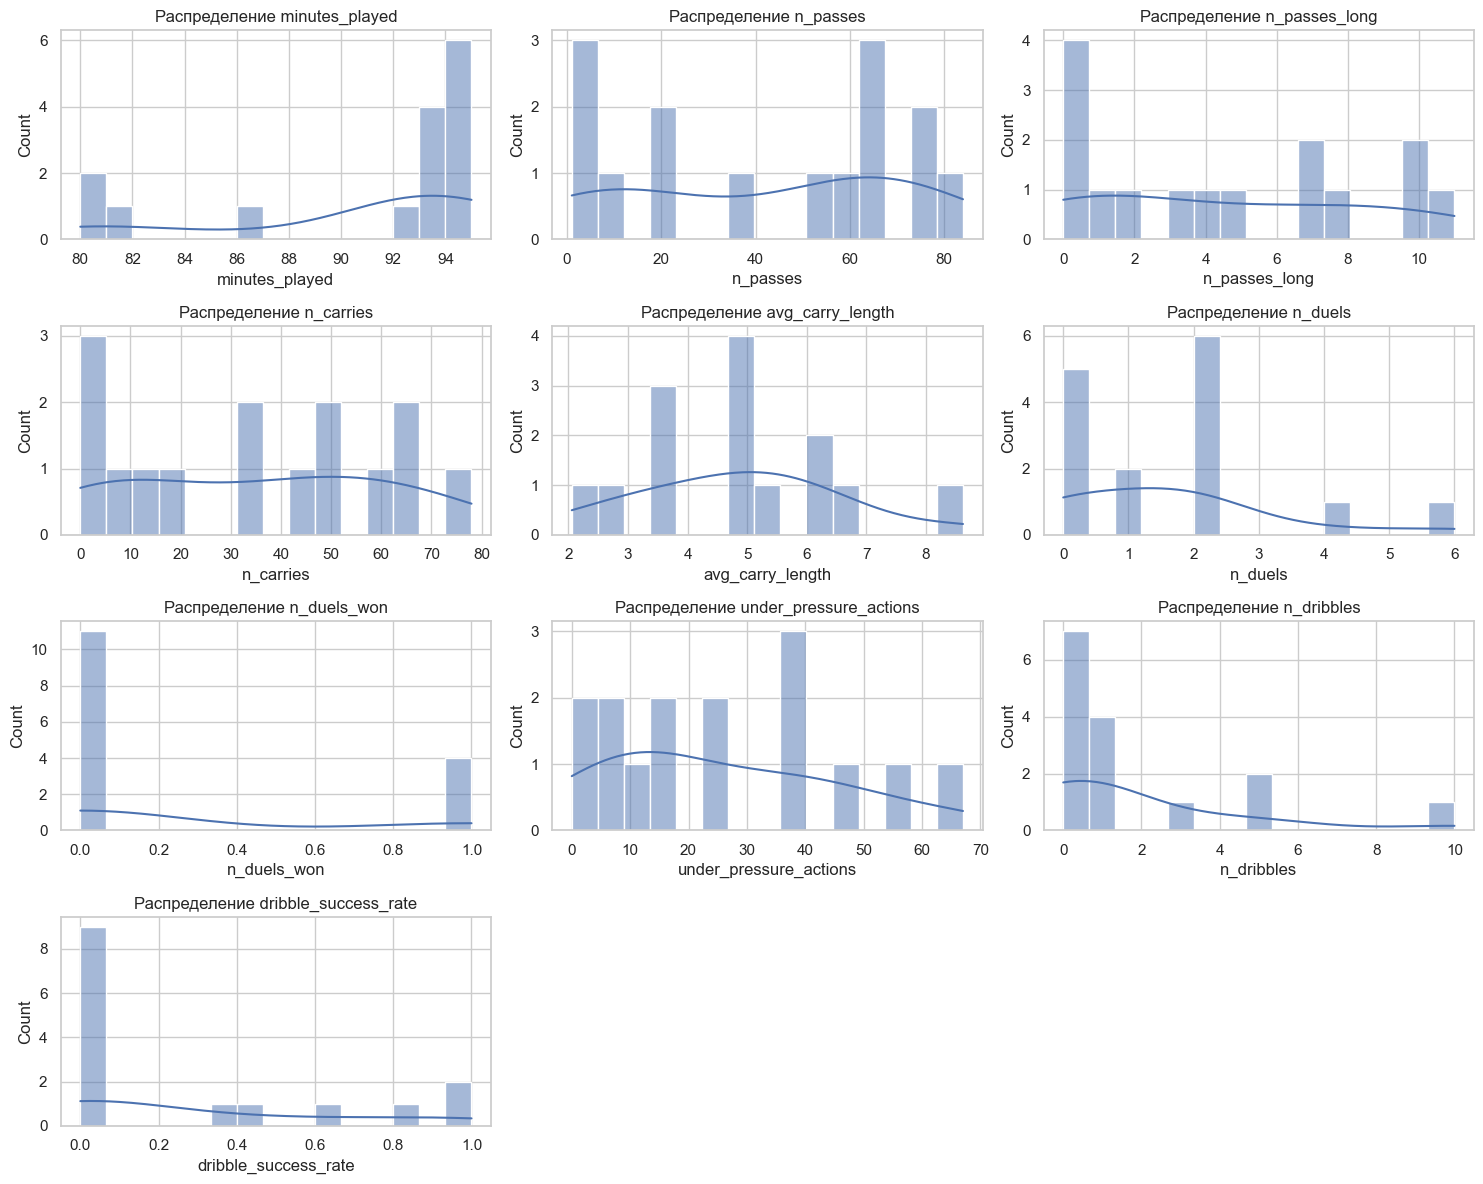

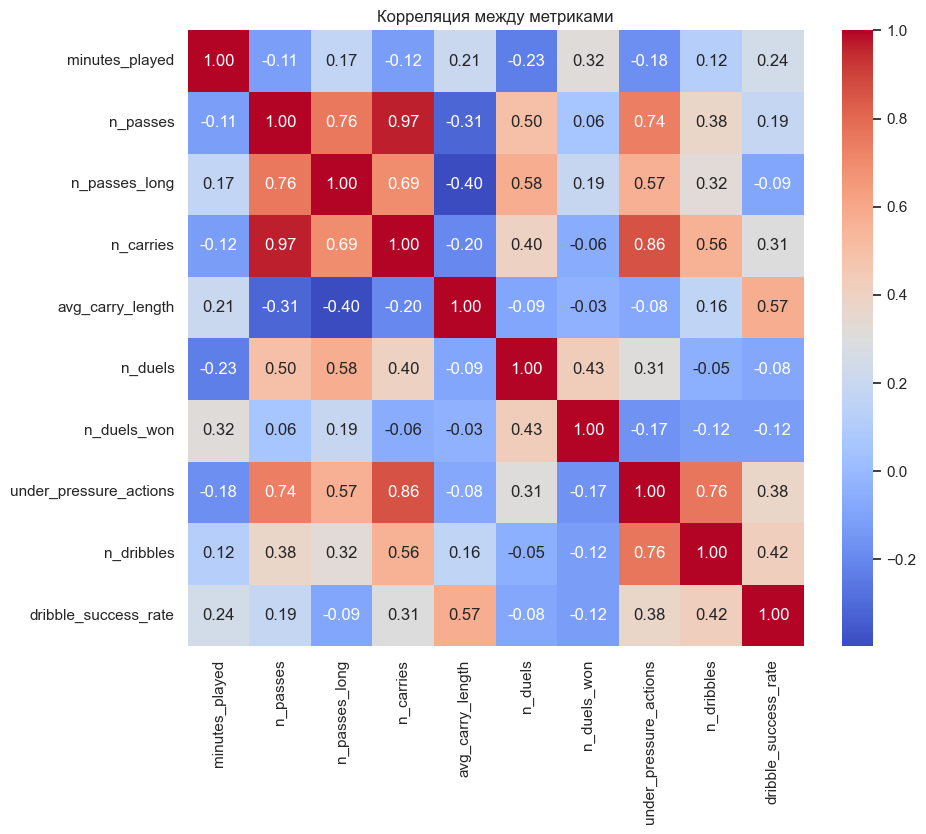

In [14]:
# Настроим стиль
sns.set(style='whitegrid')

# Список ключевых метрик для анализа
metrics = ['minutes_played', 'n_passes', 'n_passes_long', 'n_carries', 
           'avg_carry_length', 'n_duels', 'n_duels_won', 'under_pressure_actions', 
           'n_dribbles', 'dribble_success_rate']

# Построим гистограммы для каждой метрики
plt.figure(figsize=(15, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=agg_df, x=metric, bins=15, kde=True)
    plt.title(f'Распределение {metric}')
plt.tight_layout()
plt.show()

# Посмотрим матрицу корреляций
plt.figure(figsize=(10, 8))
corr = agg_df[metrics].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляция между метриками')
plt.show()

In [15]:
agg_df[agg_df['n_carries'] > 60]

,player,player_id,minutes_played,n_passes,n_passes_long,n_carries,avg_carry_length,n_duels,n_duels_won,under_pressure_actions,n_dribbles,dribble_successes,dribble_success_rate
4,Frenkie de Jong,8118.0,94,74,5,66,5.082113,2,0,36,1,1,1.0
7,Lionel Andrés Messi Cuccittini,5503.0,94,73,11,78,4.726770,1,0,67,10,4,0.4
14,Sergio Busquets i Burgos,5203.0,81,84,10,67,2.548746,4,0,46,0,0,0.0


In [16]:
agg_df[agg_df['under_pressure_actions'] > 40]

,player,player_id,minutes_played,n_passes,n_passes_long,n_carries,avg_carry_length,n_duels,n_duels_won,under_pressure_actions,n_dribbles,dribble_successes,dribble_success_rate
7,Lionel Andrés Messi Cuccittini,5503.0,94,73,11,78,4.726770,1,0,67,10,4,0.4
12,Philippe Coutinho Correia,3501.0,94,62,7,59,6.068183,2,0,55,5,3,0.6
14,Sergio Busquets i Burgos,5203.0,81,84,10,67,2.548746,4,0,46,0,0,0.0


In [17]:
agg_df[agg_df['n_dribbles'] > 2]

,player,player_id,minutes_played,n_passes,n_passes_long,n_carries,avg_carry_length,n_duels,n_duels_won,under_pressure_actions,n_dribbles,dribble_successes,dribble_success_rate
0,Anssumane Fati,30756.0,80,18,0,20,6.397853,2,0,24,3,1,0.333333
7,Lionel Andrés Messi Cuccittini,5503.0,94,73,11,78,4.726770,1,0,67,10,4,0.400000
12,Philippe Coutinho Correia,3501.0,94,62,7,59,6.068183,2,0,55,5,3,0.600000
13,Sergino Dest,21881.0,93,59,4,49,5.017638,2,1,38,5,4,0.800000


In [18]:
agg_df[agg_df['dribble_success_rate'] > 0.5]

,player,player_id,minutes_played,n_passes,n_passes_long,n_carries,avg_carry_length,n_duels,n_duels_won,under_pressure_actions,n_dribbles,dribble_successes,dribble_success_rate
4,Frenkie de Jong,8118.0,94,74,5,66,5.082113,2,0,36,1,1,1.0
10,Ousmane Dembélé,5477.0,92,9,0,11,8.623947,0,0,14,1,1,1.0
12,Philippe Coutinho Correia,3501.0,94,62,7,59,6.068183,2,0,55,5,3,0.6
13,Sergino Dest,21881.0,93,59,4,49,5.017638,2,1,38,5,4,0.8


In [19]:
agg_df[agg_df['n_duels_won'] != 0]

,player,player_id,minutes_played,n_passes,n_passes_long,n_carries,avg_carry_length,n_duels,n_duels_won,under_pressure_actions,n_dribbles,dribble_successes,dribble_success_rate
2,Clément Lenglet,6826.0,94,64,8,45,5.046687,2,1,23,0,0,0.0
5,Gerard Piqué Bernabéu,5213.0,93,51,10,33,5.497252,6,1,13,0,0,0.0
8,Martin Braithwaite Christensen,4447.0,93,4,1,3,3.667534,1,1,8,0,0,0.0
13,Sergino Dest,21881.0,93,59,4,49,5.017638,2,1,38,5,4,0.8


In [20]:
agg_df[agg_df['n_passes'] > 60].sort_values(by='n_passes', ascending=False)

,player,player_id,minutes_played,n_passes,n_passes_long,n_carries,avg_carry_length,n_duels,n_duels_won,under_pressure_actions,n_dribbles,dribble_successes,dribble_success_rate
14,Sergio Busquets i Burgos,5203.0,81,84,10,67,2.548746,4,0,46,0,0,0.0
4,Frenkie de Jong,8118.0,94,74,5,66,5.082113,2,0,36,1,1,1.0
7,Lionel Andrés Messi Cuccittini,5503.0,94,73,11,78,4.726770,1,0,67,10,4,0.4
6,Jordi Alba Ramos,5211.0,86,66,3,51,3.574510,0,0,14,1,0,0.0
2,Clément Lenglet,6826.0,94,64,8,45,5.046687,2,1,23,0,0,0.0
12,Philippe Coutinho Correia,3501.0,94,62,7,59,6.068183,2,0,55,5,3,0.6


5 игроков сделали более 60 пасов каждый

Эти игроки участвовали в розыгрыше мяча чаще других - высокая вовлеченность в игру

# Попробую расширить датасет

- **`minutes_played`** — количество минут, проведённых игроком на поле.
- **`n_passes`** — общее количество передач.
- **`n_passes_completed`** — количество точных передач.
- **`n_passes_long`** — количество длинных передач (длина > 30 метров).
- **`avg_pass_length`** — средняя длина передачи.
- **`n_passes_cross`** — количество навесов (кроссов).
- **`n_passes_switch`** — количество переводов мяча на фланг.
- **`n_through_balls`** — количество проникающих (разрезающих) передач.
- **`n_key_passes`** — передачи, завершившиеся ударом по воротам.
- **`pass_accuracy`** — точность передач (точные / общее количество).
- **`n_carries`** — количество ведений мяча.
- **`avg_carry_length`** — средняя длина ведения мяча.
- **`n_duels`** — количество единоборств.
- **`n_duels_won`** — количество выигранных единоборств.
- **`n_duels_aerial`** — количество воздушных единоборств.
- **`duel_success_rate`** — процент выигранных единоборств.
- **`under_pressure_actions`** — количество действий, совершённых под давлением.
- **`n_counterpress_actions`** — количество действий при контрпрессинге.
- **`n_dribbles`** — количество попыток обводки.
- **`dribble_successes`** — количество успешных обводок.
- **`dribble_success_rate`** — процент успешных обводок.
- **`fouls_committed`** — количество совершённых фолов.
- **`fouls_won`** — количество фолов, совершённых против игрока.
- **`yellow_cards`** — количество жёлтых карточек.
- **`red_cards`** — количество красных карточек.
- **`n_interceptions`** — количество перехватов.
- **`shots_total`** — общее количество ударов.
- **`shots_on_target`** — количество ударов в створ ворот.
- **`goals`** — количество забитых голов.
- **`total_xg`** — суммарное ожидаемое количество голов (xG).
- **`avg_xg_per_shot`** — среднее значение xG за один удар.
- **`goals_per_shot`** — соотношение голов к количеству ударов.

In [21]:
grouped_ext = df.groupby(['player', 'player_id'])

agg_df_ext = grouped_ext.agg(
    minutes_played=('minute', 'max'),
    
    # Пасы
    n_passes=('type', lambda x: (x == 'Pass').sum()),
    n_passes_long=('pass_length', lambda x: (x > 30).sum()),
    avg_pass_length=('pass_length', 'mean'),
    n_passes_cross=('pass_cross', 'sum'),
    n_passes_switch=('pass_switch', 'sum'),
    n_through_balls=('pass_through_ball', 'sum'),
    n_key_passes=('pass_shot_assist', lambda x: x.notna().sum()),

    # Ведение мяча
    n_carries=('type', lambda x: (x == 'Carry').sum()),
    avg_carry_length=('carry_length', 'mean'),

    # Единоборства и отборы
    n_duels=('type', lambda x: (x == 'Duel').sum()),
    n_duels_won=('duel_outcome', lambda x: (x == 'Won').sum()),
    n_duels_aerial=('duel_type', lambda x: (x == 'Aerial Duel').sum()),
    duel_success_rate=('duel_outcome', lambda x: (x == 'Won').sum() / x.count() if x.count() > 0 else 0),

    # Контрпрессинг и давление
    under_pressure_actions=('under_pressure', lambda x: x.sum() if x.notna().any() else 0),
    n_counterpress_actions=('counterpress', lambda x: x.sum() if x.notna().any() else 0),

    # Дриблинг
    n_dribbles=('type', lambda x: (x == 'Dribble').sum()),
    dribble_successes=('dribble_outcome', lambda x: (x == 'Complete').sum()),

    # Фолы
    fouls_committed=('type', lambda x: (x == 'Foul Committed').sum()),
    fouls_won=('type', lambda x: (x == 'Foul Won').sum()),
    yellow_cards=('foul_committed_card', lambda x: (x == 'Yellow Card').sum()),
    red_cards=('foul_committed_card', lambda x: (x == 'Red Card').sum()),

    # Перехваты
    n_interceptions=('type', lambda x: (x == 'Interception').sum()),

    # Удары и голы
    shots_total=('type', lambda x: (x == 'Shot').sum()),
    shots_on_target=('shot_outcome', lambda x: ((x == 'Saved') | (x == 'Goal')).sum()),
    goals=('shot_outcome', lambda x: (x == 'Goal').sum()),
    total_xg=('shot_statsbomb_xg', 'sum'),
    avg_xg_per_shot=('shot_statsbomb_xg', 'mean'),
).reset_index()

# Дополнительные производные метрики
agg_df_ext['dribble_success_rate'] = agg_df_ext['dribble_successes'] / agg_df_ext['n_dribbles'].replace(0, 1)
agg_df_ext['duel_win_rate'] = agg_df_ext['n_duels_won'] / agg_df_ext['n_duels'].replace(0, 1)
agg_df_ext['key_pass_rate'] = agg_df_ext['n_key_passes'] / agg_df_ext['n_passes'].replace(0, 1)
agg_df_ext['goals_per_shot'] = agg_df_ext['goals'] / agg_df_ext['shots_total'].replace(0, 1)

In [22]:
agg_df_ext.head()

,player,player_id,minutes_played,n_passes,n_passes_long,avg_pass_length,n_passes_cross,n_passes_switch,n_through_balls,n_key_passes,n_carries,avg_carry_length,n_duels,n_duels_won,n_duels_aerial,duel_success_rate,under_pressure_actions,n_counterpress_actions,n_dribbles,dribble_successes,fouls_committed,fouls_won,yellow_cards,red_cards,n_interceptions,shots_total,shots_on_target,goals,total_xg,avg_xg_per_shot,dribble_success_rate,duel_win_rate,key_pass_rate,goals_per_shot
0,Anssumane Fati,30756.0,80,18,0,13.001570,True,0,0,2,20,6.397853,2,0,0,0.0,24,5,3,1,1,0,0,0,0,2,1,1,0.42913,0.214565,0.333333,0.0,0.111111,0.5
1,Antoine Griezmann,5487.0,94,1,0,19.681717,0,0,0,0,0,NaN,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.00000,NaN,0.000000,0.0,0.000000,0.0
2,Clément Lenglet,6826.0,94,64,8,18.554381,0,True,0,0,45,5.046687,2,1,0,1.0,23,1,0,0,3,1,1,0,1,0,0,0,0.00000,NaN,0.000000,0.5,0.000000,0.0
3,Francisco António Machado Mota de Castro Trincão,22390.0,93,4,0,15.337948,True,0,0,0,3,6.581456,0,0,0,0.0,4,2,0,0,0,1,0,0,0,0,0,0,0.00000,NaN,0.000000,0.0,0.000000,0.0
4,Frenkie de Jong,8118.0,94,74,5,15.559673,0,2,0,1,66,5.082113,2,0,0,0.0,36,5,1,1,0,1,0,0,0,0,0,0,0.00000,NaN,1.000000,0.0,0.013514,0.0


In [23]:
#agg_df_ext.to_csv('bpa_statsbomb.csv', index=False, encoding='utf-8')

In [24]:
agg_df_ext.columns

Index(['player', 'player_id', 'minutes_played', 'n_passes', 'n_passes_long',
       'avg_pass_length', 'n_passes_cross', 'n_passes_switch',
       'n_through_balls', 'n_key_passes', 'n_carries', 'avg_carry_length',
       'n_duels', 'n_duels_won', 'n_duels_aerial', 'duel_success_rate',
       'under_pressure_actions', 'n_counterpress_actions', 'n_dribbles',
       'dribble_successes', 'fouls_committed', 'fouls_won', 'yellow_cards',
       'red_cards', 'n_interceptions', 'shots_total', 'shots_on_target',
       'goals', 'total_xg', 'avg_xg_per_shot', 'dribble_success_rate',
       'duel_win_rate', 'key_pass_rate', 'goals_per_shot'],
      dtype='object')

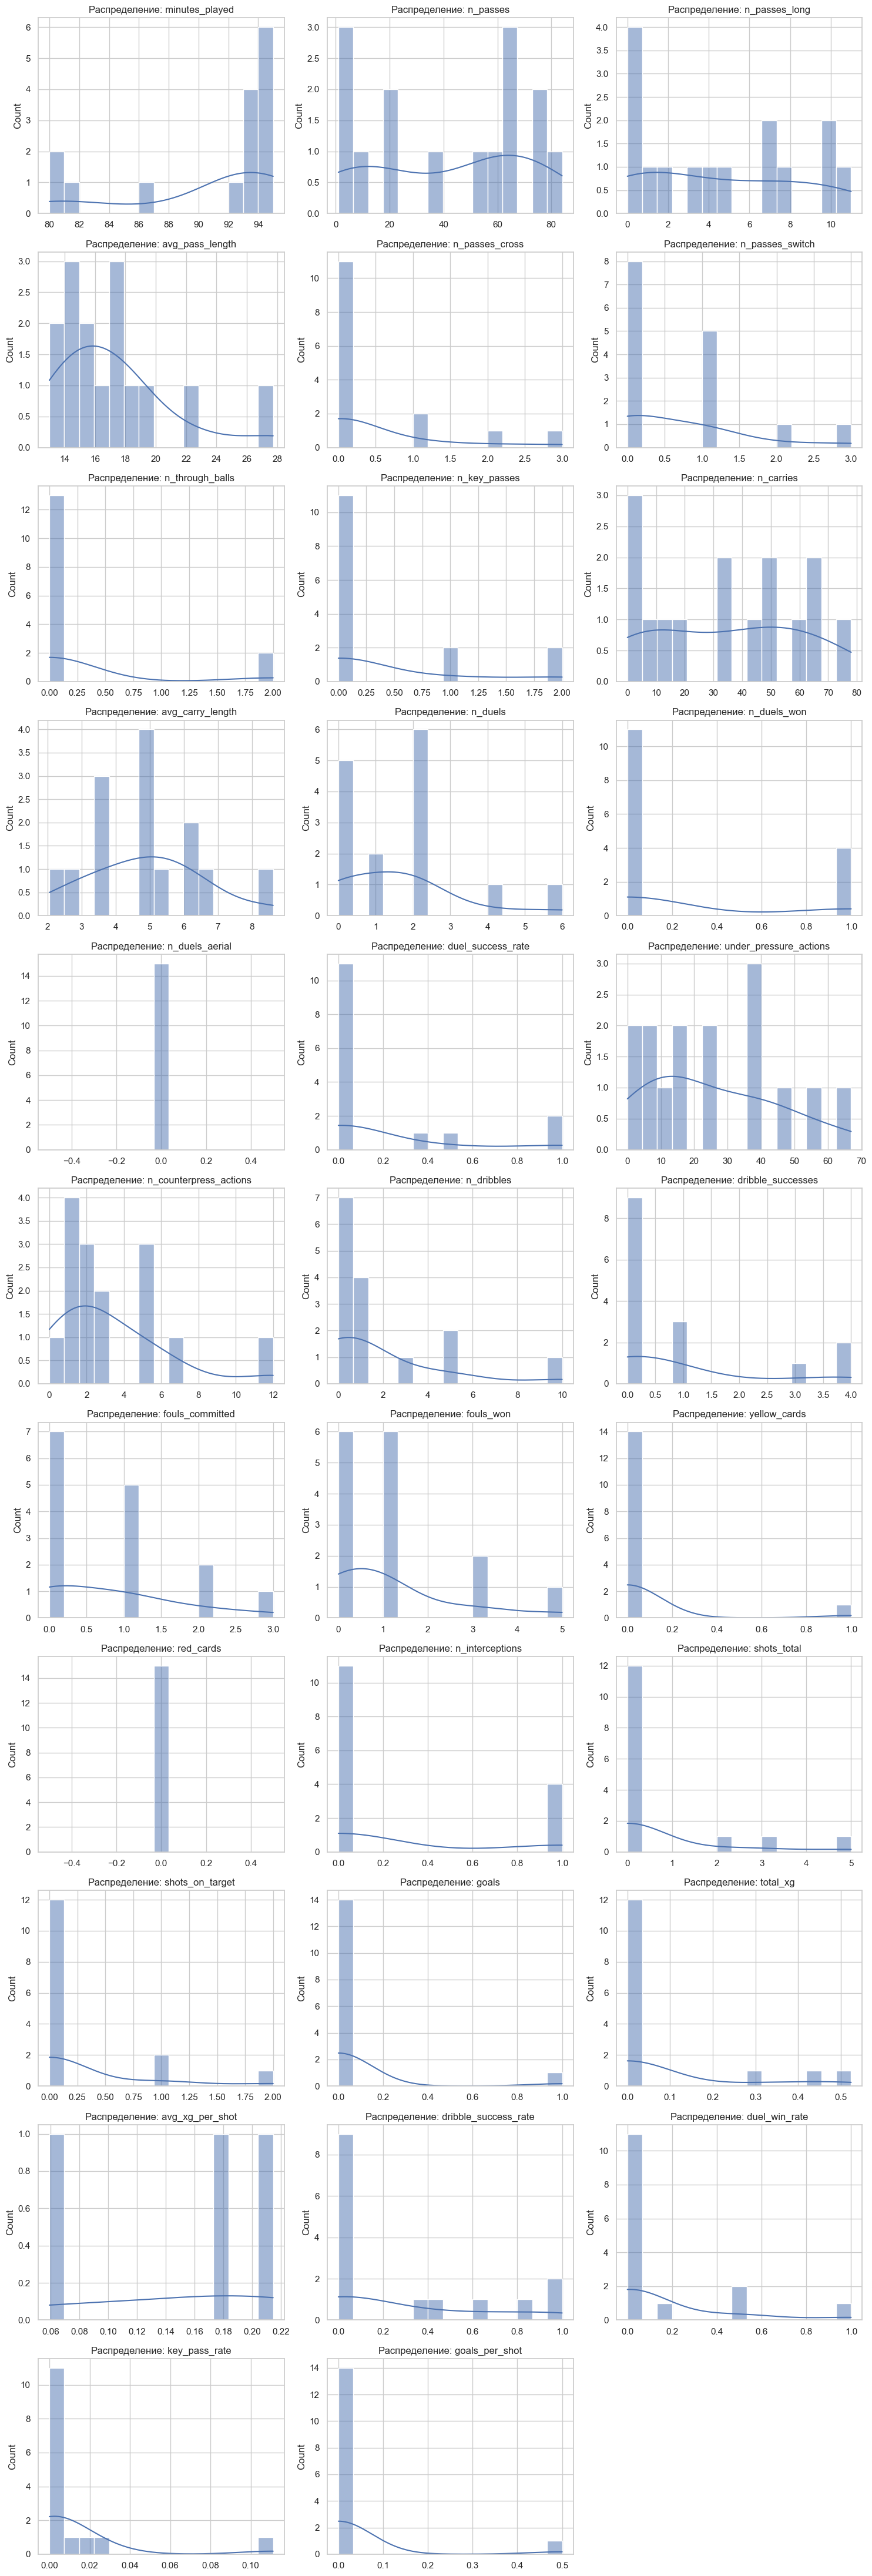

In [25]:
# Настроим стиль
sns.set(style='whitegrid')

# Список ключевых метрик для анализа
metrics = [
    'minutes_played', 'n_passes', 'n_passes_long', 'avg_pass_length',
    'n_passes_cross', 'n_passes_switch', 'n_through_balls', 'n_key_passes',
    'n_carries', 'avg_carry_length', 'n_duels', 'n_duels_won', 'n_duels_aerial',
    'duel_success_rate', 'under_pressure_actions', 'n_counterpress_actions',
    'n_dribbles', 'dribble_successes', 'fouls_committed', 'fouls_won',
    'yellow_cards', 'red_cards', 'n_interceptions', 'shots_total',
    'shots_on_target', 'goals', 'total_xg', 'avg_xg_per_shot',
    'dribble_success_rate', 'duel_win_rate', 'key_pass_rate', 'goals_per_shot'
]


# Построим гистограммы для каждой доступной метрики
n_cols = 3
n_rows = math.ceil(len(metrics) / n_cols)
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, metrics in enumerate(metrics, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=agg_df_ext, x=metrics, bins=15, kde=True)
    plt.title(f'Распределение: {metrics}')
    plt.xlabel('')
    plt.tight_layout()

plt.show()

## Топ игроков по основным метрикам

In [26]:
# Максимальное количесвто передач
max_n_passes = agg_df_ext['n_passes'].max()
best_n_passes = agg_df_ext[agg_df_ext['n_passes'] == max_n_passes]['player'].values[0]
print(f"Лучший игрок по количеству передач: {best_n_passes}\nКоличество пасов: {max_n_passes}")

Лучший игрок по количеству передач: Sergio Busquets i Burgos
Количество пасов: 84


In [27]:
#agg_df_ext['n_passes'].max()

In [28]:
# Проникающие передачи
agg_df_ext[agg_df_ext['n_through_balls'] > 0]['player'].tolist()

['Lionel Andrés Messi Cuccittini', 'Sergio Busquets i Burgos']

In [29]:
# Ключевые передачи
agg_df_ext[agg_df_ext['n_key_passes'] > 0]['player'].tolist()

['Anssumane Fati',
 'Frenkie de Jong',
 'Lionel Andrés Messi Cuccittini',
 'Sergino Dest']

In [30]:
# Количество ведений мяча
agg_df_ext[agg_df_ext['n_carries'] > 40]['player'].tolist()

['Clément Lenglet',
 'Frenkie de Jong',
 'Jordi Alba Ramos',
 'Lionel Andrés Messi Cuccittini',
 'Philippe Coutinho Correia',
 'Sergino Dest',
 'Sergio Busquets i Burgos']

In [31]:
# Среднее расстояние ведения мяча
agg_df_ext[agg_df_ext['avg_carry_length'] > 8]['player'].tolist()

['Ousmane Dembélé']

In [32]:
# Количество единоборств
agg_df_ext[agg_df_ext['n_duels'] > 3]['player'].tolist()

['Gerard Piqué Bernabéu', 'Sergio Busquets i Burgos']

In [33]:
# Количество действий под давлением
agg_df_ext[agg_df_ext['under_pressure_actions'] >= 40]['player'].tolist()

['Lionel Andrés Messi Cuccittini',
 'Philippe Coutinho Correia',
 'Sergio Busquets i Burgos']

In [34]:
# Количество контрпрессинговых действий
agg_df_ext[agg_df_ext['n_counterpress_actions'] == 12]['player'].values[0]

'Sergio Busquets i Burgos'

In [35]:
# Дриблинг
agg_df_ext[agg_df_ext['n_dribbles'] > 4]['player'].tolist()

['Lionel Andrés Messi Cuccittini', 'Philippe Coutinho Correia', 'Sergino Dest']

In [36]:
# Успешность обводок
agg_df_ext[agg_df_ext['dribble_successes'] > 2]['player'].tolist()

['Lionel Andrés Messi Cuccittini', 'Philippe Coutinho Correia', 'Sergino Dest']

In [37]:
# Перехваты
agg_df_ext[agg_df_ext['n_interceptions'] > 0]['player'].tolist()

['Clément Lenglet',
 'Jordi Alba Ramos',
 'Pedro González López',
 'Philippe Coutinho Correia']

# Топ игроков матча
Бускетс выделяется высокой вовлечённостью в игру, демонстрируя показатели топ уровня. Он несёт значительную физическую и умственную нагрузку.

**Ключевые метрики и влияние на игру**

- Лидер по количеству передач - Бускетс (84 передачи)
- Проникающие передачи - Месси, Бускетс (по 2 ключевых паса)
- Средняя дистанция с мячом - Дембеле (8.6 м)
- Пике и Бускетс - лидеры по единоборствам
- Действия под давлением - Месси, Коутиньо, Бускетс
- Контрепрессинг - Бускетс (сразу вступает в отбор при потере)

In [38]:
#agg_df_ext[agg_df_ext['player'] == 'Ousmane Dembélé']

In [39]:
#agg_df_ext.head()

## Сравнение игроков

In [40]:
player = "Sergio Busquets i Burgos"
passes = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_passes'].values[0]
long_passes = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_passes_long'].values[0]
switches = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_passes_switch'].values[0]
through_balls = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_through_balls'].values[0]
key_passes = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_key_passes'].values[0]
carries = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_carries'].values[0]
duels = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_duels'].values[0]
under_pressure_acts = agg_df_ext.loc[agg_df_ext['player'] == player, 'under_pressure_actions'].values[0]
counterpressing = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_counterpress_actions'].values[0]
dribbles = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_dribbles'].values[0]
interceptions = agg_df_ext.loc[agg_df_ext['player'] == player, 'n_interceptions'].values[0]
key_pass_rate  = agg_df_ext.loc[agg_df_ext['player'] == player, 'key_pass_rate'].values[0]

player_2 = "Jordi Alba Ramos"
passes_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_passes'].values[0]
long_passes_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_passes_long'].values[0]
switches_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_passes_switch'].values[0]
through_balls_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_through_balls'].values[0]
key_passes_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_key_passes'].values[0]
carries_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_carries'].values[0]
duels_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_duels'].values[0]
under_pressure_acts_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'under_pressure_actions'].values[0]
counterpressing_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_counterpress_actions'].values[0]
dribbles_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_dribbles'].values[0]
interceptions_2 = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'n_interceptions'].values[0]
key_pass_rate_2  = agg_df_ext.loc[agg_df_ext['player'] == player_2, 'key_pass_rate'].values[0]

player_3 = "Frenkie de Jong"
passes_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_passes'].values[0]
long_passes_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_passes_long'].values[0]
switches_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_passes_switch'].values[0]
through_balls_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_through_balls'].values[0]
key_passes_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_key_passes'].values[0]
carries_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_carries'].values[0]
duels_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_duels'].values[0]
under_pressure_acts_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'under_pressure_actions'].values[0]
counterpressing_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_counterpress_actions'].values[0]
dribbles_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_dribbles'].values[0]
interceptions_3 = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'n_interceptions'].values[0]
key_pass_rate_3  = agg_df_ext.loc[agg_df_ext['player'] == player_3, 'key_pass_rate'].values[0]

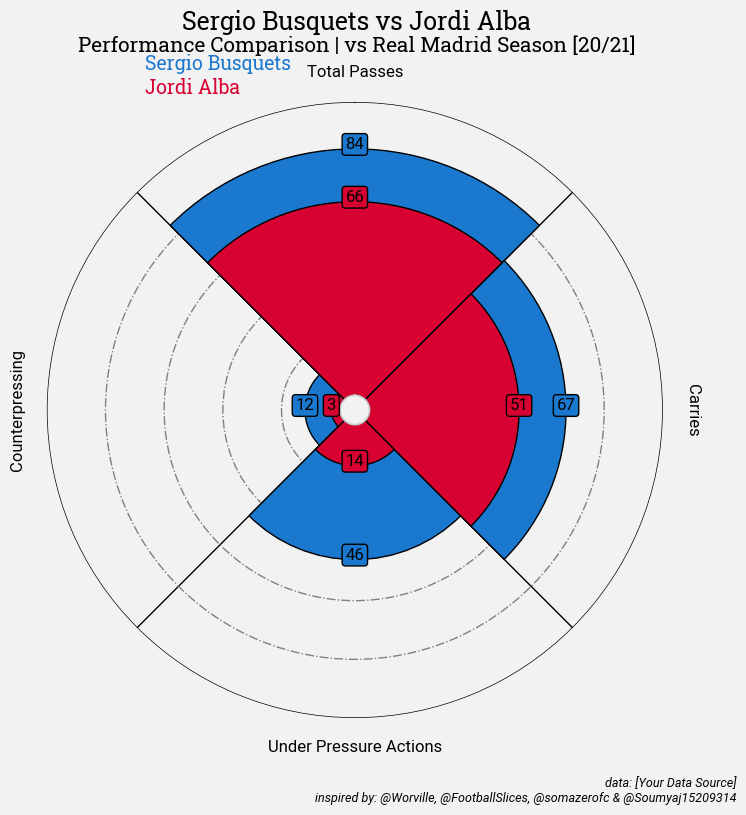

In [41]:
params = [
    "Total Passes",
    "Carries", "Under Pressure Actions",
    "Counterpressing"
]

values_busquets = [
    passes,
    carries, under_pressure_acts,
    counterpressing
]

values_alba = [
    passes_2,
    carries_2, under_pressure_acts_2,
    counterpressing_2
]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

# plot pizza
fig, ax = baker.make_pizza(
    values_busquets,
    compare_values=values_alba,
    figsize=(8, 8),
    param_location=110,
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=2, linewidth=1
    ),
    kwargs_compare=dict(
        facecolor="#D70232", edgecolor="#000000",
        zorder=2, linewidth=1
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#D70232",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

fig.text(
    0.515, 0.97, "Sergio Busquets vs Jordi Alba", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

fig.text(
    0.515, 0.942,
    "Performance Comparison | vs Real Madrid Season [20/21]",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

fig.text(
    0.25, 0.92, "Sergio Busquets", size=14,
    fontproperties=font_bold.prop, color="#1A78CF"
)
fig.text(
    0.25, 0.89, "Jordi Alba", size=14,
    fontproperties=font_bold.prop, color="#D70232"
)

CREDIT_1 = "data: [Your Data Source]"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()

- Действия на поле и вовлеченность в игру отличается в зависимости от позиции на поле. Особенно наглядно различие в количестве действий под прессингом.
- Также по количеству пасов Альба (левый защитник) не сильно уступает Бускетсу (опорный пзщ) - это говорит о том, что команда максимально задействует крайнего защитника в построении игры.

In [42]:
#pd.read_csv('C:\\Users\\lazar\\football_data_analysis\\bpa_statsbomb.csv')

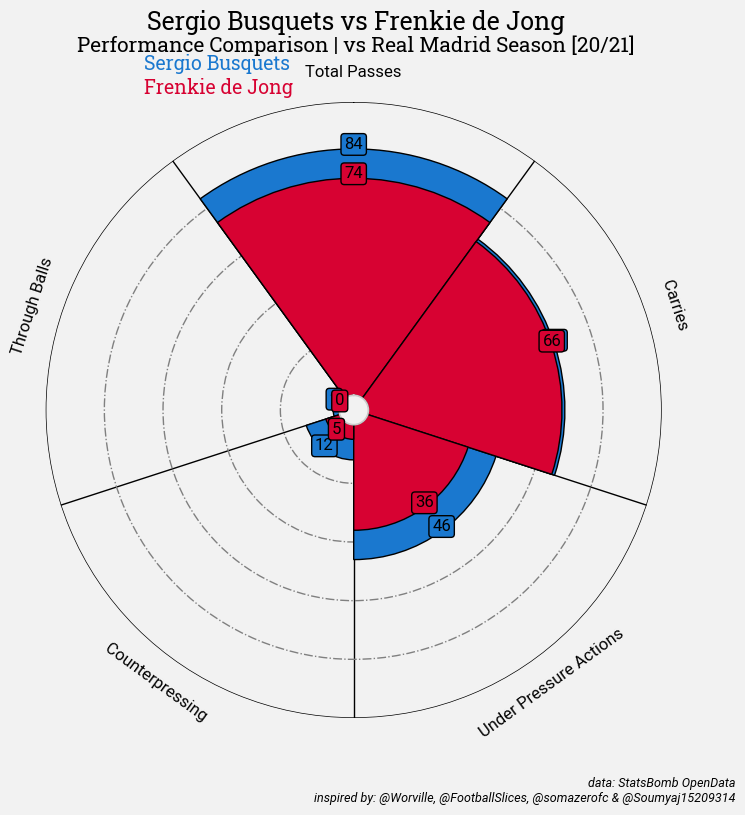

In [43]:
params = [
    "Total Passes",
    "Carries", "Under Pressure Actions",
    "Counterpressing", "Through Balls"
]

values_busquets = [
    passes,
    carries, under_pressure_acts,
    counterpressing, through_balls
]

values_frenkie = [
    passes_3,
    carries_3, under_pressure_acts_3,
    counterpressing_3, through_balls_3
]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

fig, ax = baker.make_pizza(
    values_busquets,
    compare_values=values_frenkie,
    figsize=(8, 8),
    param_location=110,
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=2, linewidth=1
    ),
    kwargs_compare=dict(
        facecolor="#D70232", edgecolor="#000000",
        zorder=2, linewidth=1
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#D70232",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

fig.text(
    0.515, 0.97, "Sergio Busquets vs Frenkie de Jong", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

fig.text(
    0.515, 0.942,
    "Performance Comparison | vs Real Madrid Season [20/21]",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

fig.text(
    0.25, 0.92, "Sergio Busquets", size=14,
    fontproperties=font_bold.prop, color="#1A78CF"
)
fig.text(
    0.25, 0.89, "Frenkie de Jong", size=14,
    fontproperties=font_bold.prop, color="#D70232"
)

CREDIT_1 = "data: StatsBomb OpenData"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()

При сравнении двух игроков схожего амплуа метрики уже менее различны. Но при этом, Бускетс больше вовлечен в игру, чем Френки, совершая больше действий под прессингом, с бОльшим количеством контрпрессинговых действий.

In [44]:
#values_busquets

In [45]:
#values_frenkie

In [46]:
#busquets = [passes, long_passes, switches, through_balls, key_passes, carries, duels,
#    under_pressure_acts, counterpressing, dribbles, interceptions, key_pass_rate]
#busquets

In [47]:
#frenkie = [passes_3, long_passes_3, switches_3, through_balls_3, key_passes_3, carries, duels_3,
#    under_pressure_acts_3, counterpressing_3, dribbles_3, interceptions_3, key_pass_rate_3]
#frenkie

# Вывод

Продемонстрированы методы анализа сырых данных, используя Open Data Statsbomb.

Проводился анализ одной команды в одном конкретном матче.

Идеи для будущего углубленного анализа:
- Сравнить распределение нагрузки по позициям за сезон.
- Оценить эффективность контрпрессинга.
- Изучить корреляцию между дриблингом и xG (ожидаемыми голами).
- Как позиция на поле влияет на тип борьбы?
- Есть ли связь между нагрузкой и количеством фолов?
- Группировать и сравнить игроков по позициям.
- Предсказание риска травм на основе нагрузки.